In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Data Generation
- We generate \(d = 50\) different datasets.
- Each dataset contains \(N = 30\) data pairs \((y_i, x_i)\), where the true relationship is modeled as:
  \[
  y' = 2 \cdot x
  \]
- Gaussian noise with zero mean and variance \(\sigma^2 = 64\) is added to the true values \(y'\), resulting in noisy observations \(y\).
  \[
  y_i = y' + \eta_i, \quad \eta_i \sim N(0, 64)
  \]
The observed data pairs \((y_i, x_i)\) are used for linear regression estimation.

**Interpretation**:
- By adding noise, we simulate real-world scenarios where data is imperfect. The larger the variance (here, 64), the more "spread out" or "noisy" the data becomes, making it harder to perfectly estimate the true parameter (\(\theta_0 = 2\)).
- This noise can cause fluctuations in the resulting estimates from different datasets.


In [2]:
# Set a random seed for reproducibility
np.random.seed(42)

# Parameters of the problem
N = 30            # Number of data points
sigma2 = 64       # Variance of the noise
true_theta = 2    # True value of the parameter theta

# Generate input data (x) uniformly from 0 to 10
x = np.random.uniform(0, 10, N)

# Generate clean output data (y_clean) based on true_theta
y_clean = true_theta * x

# Add noise (Gaussian) to the output data
noise = np.random.normal(0, np.sqrt(sigma2), N)
y_noisy = y_clean + noise

### Linear Least Squares Estimates

For each dataset, we compute the least squares (LS) linear estimate of \(\theta_0\), denoted as \(\theta_1, \theta_2, ..., \theta_d\). These estimates are obtained based on the noisy data, and we aim to see how well the LS estimate performs in recovering the true value of \(\theta_0 = 2\).

**Interpretation**:
- Least squares estimation aims to minimize the sum of the squared differences between the observed values \(y_i\) and the predicted values based on the model.
- Since we are using noisy data, the estimates \(\theta_1, \theta_2, ..., \theta_d\) will likely vary around the true value \(\theta_0 = 2\). However, if the noise is not too extreme, most estimates should be relatively close to 2.


In [3]:
# Compute the theta estimate (theta_hat) using least squares
theta_hat = np.sum(x * y_noisy) / np.sum(x**2)
print("Theta Estimate:", theta_hat)

Theta Estimate: 1.4441161002119276


### Mean Squared Error (MSE) Computation

To evaluate the accuracy of our LS estimates, we compute the Mean Squared Error (MSE) of the estimates. MSE quantifies how close the estimates are to the true value of \(\theta_0 = 2\).
The MSE is given by:
  \[
  MSE = \frac{1}{d} \sum_{i=1}^{d} (\theta_i - \theta_0)^2
  \]
A smaller MSE indicates better performance of the LS estimator.

**Interpretation**:
- MSE measures the average squared difference between the estimated values and the true parameter \(\theta_0\).
- A lower MSE indicates that the estimates are generally close to \(\theta_0 = 2\), while a higher MSE suggests greater deviation, possibly due to larger noise in the data or other sources of error.
- In this case, the noise added to the data may increase the MSE, but a reasonable MSE indicates that the estimator is still performing well despite the noise.


In [4]:
# Estimate theta multiple times to analyze variability
theta_estimates = []
for _ in range(50):  # Repeat for 50 iterations
    y_noisy = y_clean + np.random.normal(0, np.sqrt(sigma2), N)
    theta_hat = np.sum(x * y_noisy) / np.sum(x**2)
    theta_estimates.append(theta_hat)

In [5]:
# Calculate Mean Squared Error (MSE)
mse = np.mean((np.array(theta_estimates) - true_theta)**2)
print("MSE:", mse)

MSE: 0.09317554849159565


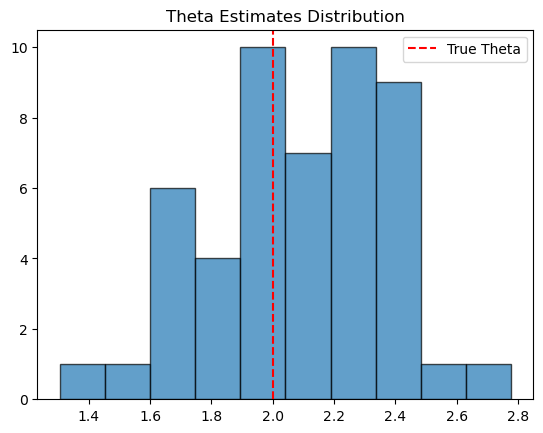

In [6]:
# Plot the distribution of theta estimates
plt.hist(theta_estimates, bins=10, edgecolor='k', alpha=0.7)
plt.axvline(true_theta, color='r', linestyle='--', label='True Theta')
plt.title('Theta Estimates Distribution')
plt.legend()
plt.show()

### Graphical Representation of \(\theta_1, \theta_2, ..., \theta_d\)

The following plot shows the distribution of the estimated values \(\theta_1, \theta_2, ..., \theta_d\) around the true value of \(\theta_0 = 2\). By observing the spread of the values, we can infer how much variability exists in the estimates due to the added Gaussian noise.

- If the estimates cluster closely around 2, it indicates that the LS estimator performs well.
- A large spread suggests high variability in the estimates, which may result from the added noise.

**Interpretation**:
- If the plot shows most of the \(\theta_i\) values near 2, it means that the LS estimator is consistently close to the true parameter, despite the noise.
- A wider spread of \(\theta_i\) values would indicate greater variability in the estimates, which can occur when the noise in the data is substantial. In such cases, the estimates may deviate more from the true value.
